In [1]:
from Data_analysis import Data_analysis
from Dedrift import Dedrift
from Data import Data
import matplotlib.pyplot as plt

import seaborn
import seaborn as sns


%matplotlib widget

custom_params = {
    "xtick.direction": "in",
    "ytick.direction": "in",
    "lines.markeredgecolor": "k",
    "lines.markeredgewidth": 1,
    "figure.dpi": 100,
    "text.usetex": False,
    "font.family": "serif"
}
sns.set_theme(context = "notebook", style="ticks", rc=custom_params)

In [43]:
data = Data(file = "xyz.mat", fps = 100, cutoff= 120000)

In [44]:
data.dedrift(window = 10000)


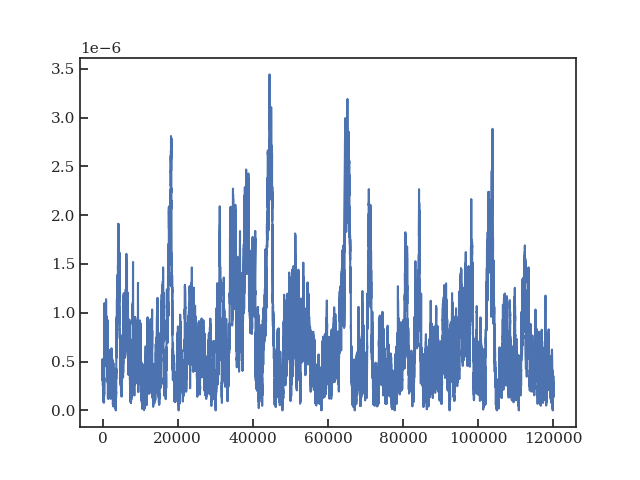

In [45]:
plt.figure()
plt.plot(data.z)
plt.show()

In [46]:
args = {
    "MSD_bins":  100,  # Number of PDF bins
    "t_LMSD": (20.0, 25),  # Time used to compute the plateau
    "t_sPDF":(0.01, 0.05),  # Short time PDF dispalcement
    "range_pdf": (1e-8, 2.5e-6),  # Range of the height PDF
    "num_pdf":  70,  # number of bins in the height PDF
    "range_F_eq": (1e-8, 2e-6),
    "num_F_eq":  50,
    "SPDF_bins": 40,  # Short time PDF bins
    "t_Lpdf":  (18.0, 20.0),  # time for the long time PDF
    "range_D": (1e-9, 2e-6),  # range of computation of Ronceray
    "N_local_D": 200,  # mber of points for the diffusion computation
    "ordre_D": 2,  # Ronceray polynomial order
    "LPDF_bins": 50,  # number of bins in the long time PDF
}

In [47]:
data.dedrift(window = 5000)
analysis = Data_analysis(data, **args)


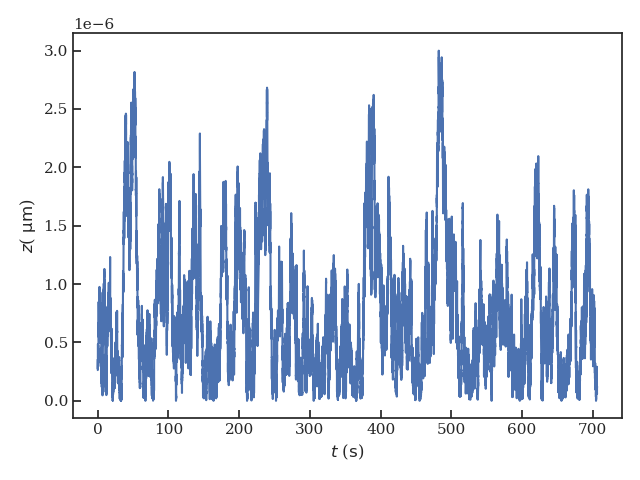

In [26]:
data.plot_1D("z")

In [51]:
analysis.computing_all()

Computing MSD
Computing MSD on x


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 930.71it/s]


Computing MSD on y


100%|████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 1347.30it/s]


Computing MSD on z


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 997.94it/s]
D:\projets\soft_force_measurement\16052022\Data_analysis.py:304: RuntimeWarning: divide by zero encountered in log
  self.F_eq = np.gradient(np.log(pdf_z), z_pdf) * 4e-21
C:\Users\m.lavaud\.conda\envs\analyse2\lib\site-packages\numpy\lib\function_base.py:1223: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


Computing long time MSD
Computing PDF
Computing the conservative forces
Computing 4th cumulant
Computing C4 on x


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 204.76it/s]


Computing C4 on y


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 210.08it/s]


Computing C4 on z


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 160.17it/s]


Computing PDF at small times
Computing PDF at large time
Computing the local diffusion


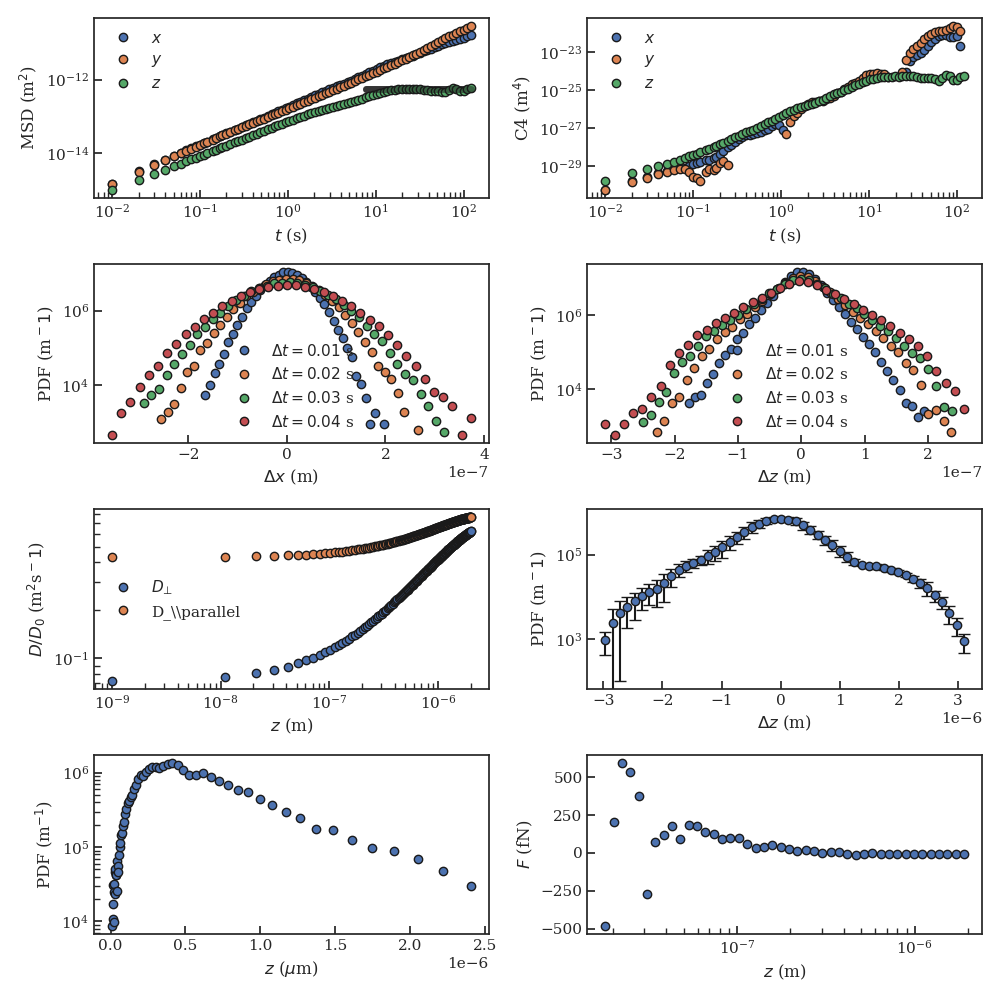

In [52]:
analysis.general_plot()

In [15]:
np.array(list(map(float,analysis.short_time_PDF_Dx.keys())))

array([1., 2., 3., 4.])

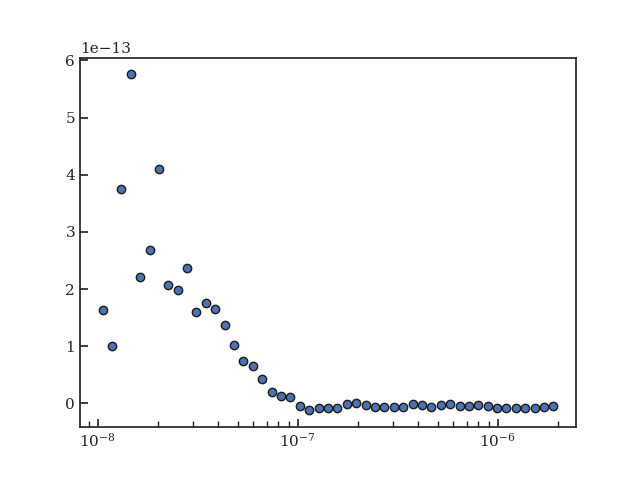

In [7]:
plt.figure()
plt.semilogx(analysis.z_F_eq, analysis.F_eq, "o")

plt.show()

In [20]:
analysis.z_F_eq

array([1.05709569e-08, 1.17780691e-08, 1.31230231e-08, 1.46215593e-08,
       1.62912154e-08, 1.81515319e-08, 2.02242804e-08, 2.25337190e-08,
       2.51068755e-08, 2.79738644e-08, 3.11682387e-08, 3.47273830e-08,
       3.86929510e-08, 4.31113526e-08, 4.80342976e-08, 5.35194006e-08,
       5.96308550e-08, 6.64401849e-08, 7.40270815e-08, 8.24803364e-08,
       9.18988802e-08, 1.02392941e-07, 1.14085332e-07, 1.27112894e-07,
       1.41628092e-07, 1.57800799e-07, 1.75820291e-07, 1.95897453e-07,
       2.18267255e-07, 2.43191495e-07, 2.70961868e-07, 3.01903379e-07,
       3.36378144e-07, 3.74789629e-07, 4.17587376e-07, 4.65272257e-07,
       5.18402340e-07, 5.77599420e-07, 6.43556298e-07, 7.17044882e-07,
       7.98925230e-07, 8.90155608e-07, 9.91803708e-07, 1.10505915e-06,
       1.23124738e-06, 1.37184522e-06, 1.52849813e-06, 1.70303944e-06,
       1.89751188e-06])

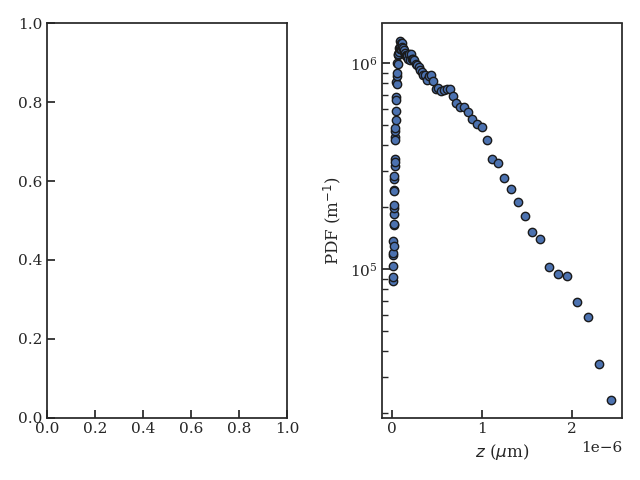

In [18]:
plt.figure()

ax1 = plt.subplot(121)
analysis.plot("F_eq", ax1)

ax2 = plt.subplot(122)
analysis.plot("pdf", ax2)

plt.tight_layout()

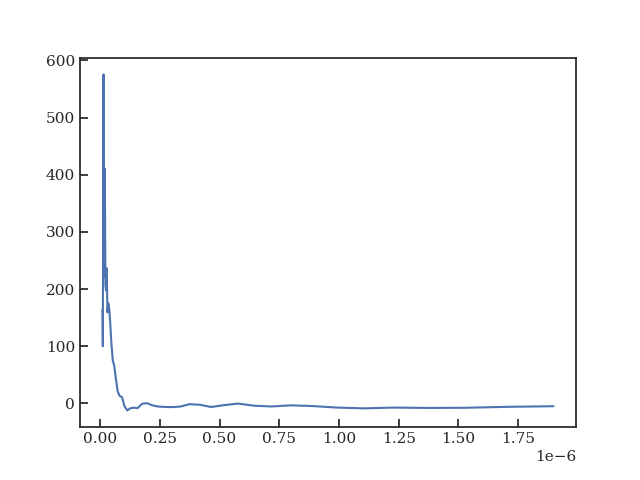

In [16]:
plt.ioff()
fig = plt.figure()
plt.ion()
plt.plot(analysis.z_F_eq, analysis.F_eq*1e15)
plt.show()

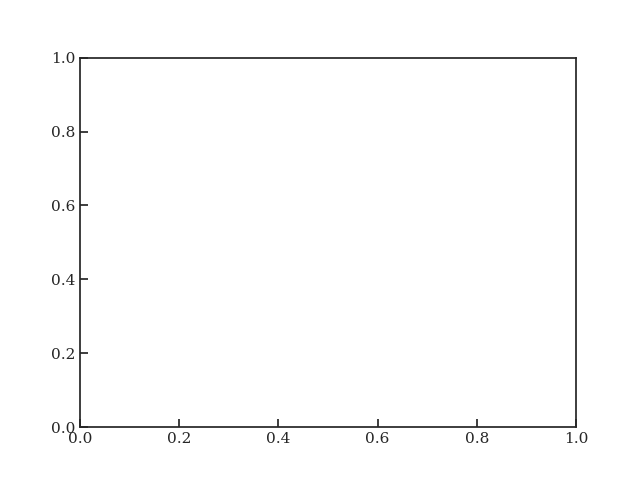

In [17]:
analysis.plot("F_eq")

In [ ]:
from StochasticForceInference.StochasticForceInference import *
import numpy as np

In [ ]:
pos = np.ones((len(analysis.Data.x), 3))
pos[:, 0] = analysis.Data.x * 1e-6
pos[:, 1] = analysis.Data.y * 1e-6
pos[:, 2] = analysis.Data.z * 1e-6

tlist = np.arange(len(pos)) * analysis.Data.dt
xlist = np.ones((len(pos),1,3))
xlist[:,0,:] = pos
data = StochasticTrajectoryData(xlist,tlist)

S = StochasticForceInference(data)
S.compute_diffusion( basis = {"type" : "polynomial", "order" : 3 })
    

In [ ]:
z_min, z_max = (10e-9, 2e-6)
N = 100

In [ ]:
dir1 = np.zeros(3); dir1[0] = 1
dir2 = np.zeros(3); dir2[1] = 1
dir3 = np.zeros(3); dir3[2] = 1

Rmin=data.X_ito.min(axis=(0,1))
Rmax=data.X_ito.max(axis=(0,1))
    
xbin=np.linspace(Rmin[0],Rmax[0],N)
ybin=np.linspace(Rmin[1],Rmax[1],N)
    
if z_min == None:
    z_min = Rmin[2]
if z_max == None:
    z_max = Rmax[2]
        
zbin = np.linspace(z_min, z_max, N)
        
positions = [a * dir1 + b * dir2  + c * dir3 for a in xbin for b in ybin for c in zbin]
    
NN = len(positions)
gridX,gridY,gridZ = np.zeros(NN),np.zeros(NN),np.zeros(NN)
Dxx,Dyy,Dzz,Dxy, Dxz, Dyz = np.zeros(NN),np.zeros(NN),np.zeros(NN),np.zeros(NN),np.zeros(NN),np.zeros(NN)

In [ ]:
for n, pos in enumerate(positions):
        
    gridX[n] = dir1.dot(pos)
    gridY[n] = dir2.dot(pos)
    gridZ[n] = dir3.dot(pos)
        

        
    tensor = S.D_ansatz(pos.reshape((1,3)))
    Dxx[n], Dyy[n], Dzz[n] = np.squeeze(tensor.diagonal(axis1 = 2))
    Dxy[n] = np.squeeze(tensor)[0,1]
    Dxz[n] = np.squeeze(tensor)[0,2]
    Dyz[n] = np.squeeze(tensor)[1,2]


In [ ]:
np.shape(Dxx)

In [ ]:
inflate = lambda a : np.reshape(a,(N,N,N))
    
to_inflate = Dxx, Dyy, Dzz, gridZ
Dx, Dy, Dz, zz = map(inflate, to_inflate)
del to_inflate
    
to1d = lambda a : np.mean(np.mean(a, axis = 0),0)
to_1d = Dx, Dy, Dz, zz
    
Dxxm, Dyym, Dzzm, z = map(to1d,to_1d)

In [ ]:
inflate = lambda a : np.reshape(a,(N,N,N))
    
to_inflate = Dxy, Dxz, Dyz, gridZ
Dxy, Dxz, Dyz, zz = map(inflate, to_inflate)
del to_inflate
    
to1d = lambda a : np.mean(np.mean(a, axis = 0),0)
to_1d = Dxy, Dxz, Dyz, zz
    
Dxym, Dxzm, Dyzm, z = map(to1d,to_1d)

In [ ]:
plt.figure()

# plt.plot(z,Dxym, "o", label = "Dxy")
# plt.plot(z,Dxzm, "o", label = "Dxz")
# plt.plot(z,Dyzm, "o", label = "Dyz")


plt.errorbar(z,Dxxm,yerr = Dxxm*S.diffusion_projections_self_consistent_error**0.5,fmt= "o", ecolor = "k", label = "Dxx")
plt.loglog(z,Dyym, "d", label = "Dyy")
plt.errorbar(z,Dzzm, yerr = Dzzm*S.diffusion_projections_self_consistent_error**0.5,fmt= "o", ecolor = "k", label = "Dzz")
plt.legend()
plt.show()

In [ ]:
plt.figure()

plt.plot(z,Dxym, "o", label = "Dxy")
plt.plot(z,Dxzm, "o", label = "Dxz")
plt.plot(z,Dyzm, "o", label = "Dyz")
plt.legend()
plt.show()

In [ ]:
#S.compute_drift(basis = {"type" : "polynomial", "order" : 3 })
S.compute_diffusion_error()

In [ ]:
S.diffusion_projections_self_consistent_error**0.5

In [ ]:
analysis.general_plot()

In [ ]:


dir1 = np.zeros(3); dir1[0] = 1
dir2 = np.zeros(3); dir2[1] = 1
dir3 = np.zeros(3); dir3[2] = 1

    Rmin=data.X_ito.min(axis=(0,1))
    Rmax=data.X_ito.max(axis=(0,1))
    
    xbin=np.linspace(Rmin[0],Rmax[0],N)
    ybin=np.linspace(Rmin[1],Rmax[1],N)
    
    if z_min == None:
        z_min = Rmin[2]
    if z_max == None:
        z_max = Rmax[2]
        
    zbin = np.linspace(z_min, z_max, N)
        
    positions = [a * dir1 + b * dir2  + c * dir3 for a in xbin for b in ybin for c in zbin]
    
    NN = len(positions)
    gridX,gridY,gridZ = np.zeros(NN),np.zeros(NN),np.zeros(NN)
    Dx,Dy,Dz = np.zeros(NN),np.zeros(NN),np.zeros(NN)

    
#     for n, pos in enumerate(positions):
        
#         gridX[n] = dir1.dot(pos)
#         gridY[n] = dir2.dot(pos)
#         gridZ[n] = dir3.dot(pos)
        

        
#         tensor = S.D_ansatz(pos.reshape((1,3)))
#         Dx[n], Dy[n], Dz[n] = np.squeeze(tensor.diagonal(axis1 = 2))
        
    
#     inflate = lambda a : np.reshape(a,(N,N,N))
    
#     to_inflate = Dx, Dy, Dz, gridZ
#     Dx, Dy, Dz, zz = map(inflate, to_inflate)
#     del to_inflate
    
#     to1d = lambda a : np.mean(np.mean(a, axis = 0),0)
#     to_1d = Dx, Dy, Dz, zz
    
#     Dxm, Dym, Dzm, z = map(to1d,to_1d)
    
#     return  Dxm, Dym, Dzm, z
        

In [ ]:
plt.ioff()
fig = plt.plot()
plt.ion()
ax = plt.gca()
analysis.plot("local_D", ax)
plt.tight_layout()
plt.show()

In [ ]:
plt.clf()

In [ ]:
analysis.plot("pdf")


In [ ]:
analysis.plot("F_eq")

In [ ]:
plt.figure()
plt.semilogx(analysis.z_F_eq, analysis.F_eq, "o")
plt.show()

In [ ]:
analysis.general_plot()

In [ ]:
data.z

In [52]:
r=1.578e-6
def Dz_z(z,off):
    off = off
    z = z - off
    result = ((6*z*z + 2*r*z) / (6*z*z + 9*r*z + 2*r*r))
    return result

def Dx_z(z,offset):
    offset = offset 
    z = z - offset # We force an positive offset, meaning the trajectory si to low
    result = (1 - 9/16*(r/(z+r)) + 1/8*(r/(z+r))**3 - 45/256*(r/(z+r))**4 - 1/16*(r/(z+r))**5)
    return result

def Dz_z_log(z,off):
    z = np.exp(z)
    off = off
    z = z - off
    result = ((6*z*z + 2*r*z) / (6*z*z + 9*r*z + 2*r*r))
    return np.log(result)

def Dx_z_log(z,offset):
    z = np.exp(z)
    offset = offset 
    z = z - offset # We force an positive offset, meaning the trajectory si to low
    result = (1 - 9/16*(r/(z+r)) + 1/8*(r/(z+r))**3 - 45/256*(r/(z+r))**4 - 1/16*(r/(z+r))**5)
    return result

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [91]:
z_D = analysis.z_D[:]
D_x =  (analysis.Dx[:] + analysis.Dy[:]) / 2 / analysis.Do
D_z = analysis.Dz[:] / analysis.Do 


popt_z, pcov_z = curve_fit(Dz_z_log, np.log(z_D), np.log(D_z), p0 = [-100e-9])
popt_x, pcov_x = curve_fit(Dx_z_log, np.log(z_D), np.log(D_x), p0 = [-200e-9])



In [102]:
popt_z * 1e9

array([-119.37274288])

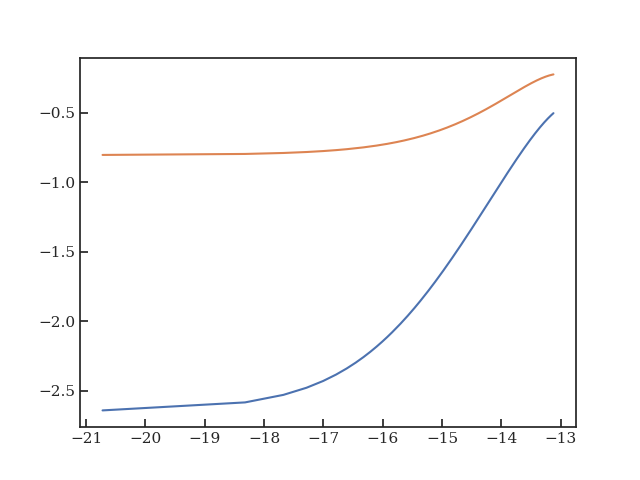

In [88]:
plt.figure()
plt.plot(np.log(z_D), np.log(D_z))
plt.plot(np.log(z_D), np.log(D_x))

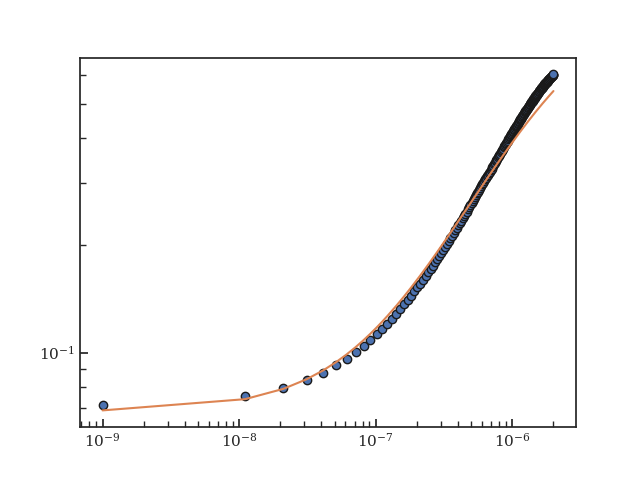

In [81]:
plt.plot(np.log(z_D), np.log(D_x))
plt.plot(np.log(z_D), np.log(D_z))

plt.show()

In [107]:
Data.plot_1D(axis = "z")

TypeError: Data.plot_1D() missing 1 required positional argument: 'self'

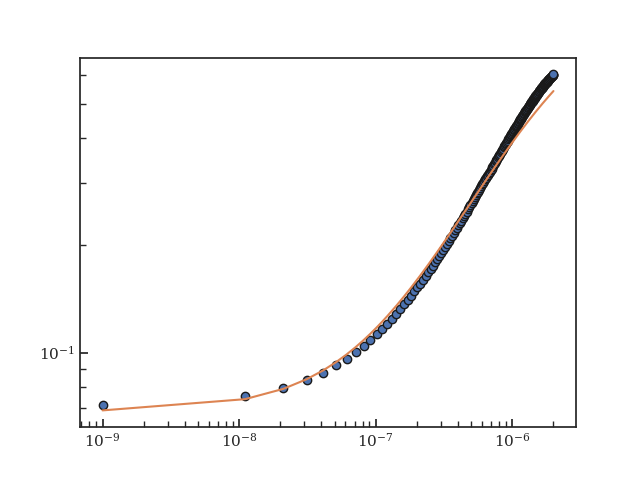

In [100]:
plt.figure()
# plt.loglog(z_D, D_x, "o")
# plt.plot(z_D, Dx_z(z_D, popt_z))

plt.loglog(z_D, D_z, "o")
plt.plot(z_D, Dz_z(z_D, popt_z))
plt.show()

In [22]:
from scipy.optimize import curve_fit

In [23]:
import numpy as np
import matplotlib as mpl

In [24]:
import pickle
with open('dataset.pickle', 'rb') as handle:
    dataset = pickle.load(handle)

In [25]:
t = np.arange(0, len(data.z)) * data.dt

C:\Users\m.lavaud\AppData\Local\Temp\ipykernel_13428\2806421755.py:81: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig("brownian.pdf")
C:\Users\m.lavaud\.conda\envs\analyse2\lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self.figure.savefig(buf, format='png', dpi='figure')


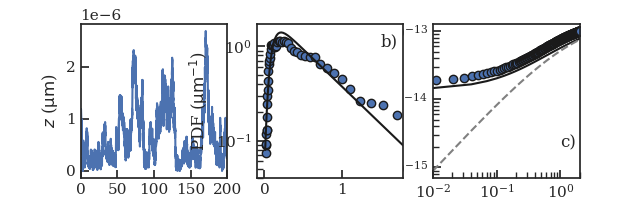

In [26]:
plt.figure(tight_layout=True, figsize=(4*1.61, 2))
ax = plt.subplot(131)
plt.plot(t[:20000], data.z[:20000])
plt.xlabel("$t$ (s)")
plt.ylabel("$z$ ($\mathrm{\mu m}$)")
plt.text(170, 2.5, "a)")
ax.set_xticks([0, 50, 100, 150, 200])
z_plot = np.linspace(1e-2, 3, 100)* 1e-6 
plt.xlim(0, 200)

plt.subplot(133)

plt.loglog(analysis.z_D[1:]*1e6, analysis.Dz[1:] ,"o", label=r"$D_\bot$")
#ax.plot(z_D, Dx / Do,"o", label="Dx")
#ax.plot(z_D, Dy / Do,"o" label="Dy")
#plt.plot(analysis.z_D[1:]*1e6, (analysis.Dx[1:] + analysis.Dy[1:]) / 2 / analysis.Do, "o", label= r"$D_\parallel$")
#plt.plot(z_plot*1e6, Dx_z(z_plot, -180e-9), "k")
plt.plot(z_plot*1e6, Dz_z(z_plot, -180e-9)*analysis.Do, "k")
plt.plot(z_plot*1e6, Dz_z(z_plot, 0)*analysis.Do, "gray",linestyle= "--")

plt.xlabel("$z$ ($\mathrm{\mu m}$)")
plt.ylabel(r"$D_\bot$ ($\mathrm{m^2. s^{-1}}$)")
# plt.legend(frameon=False)

plt.text(1, 2e-15, "c)")

ax = plt.gca()

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax.xaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

plt.xlim((1e-2, 2))



ax = plt.subplot(132)

plt.text(1.5, 1, "b)")
plt.semilogy(dataset["x_pdf_z"] * 1e6 - dataset["offset_B"],dataset["pdf_z"], "o")

#analysis.plot("pdf", ax)
ax.set(xlabel = "$z$ ($\mathrm{\mu m}$)", ylabel = "PDF ($\mathrm{\mu m ^{-1}}$)")
plt.plot(dataset["x_pdf_z"] * 1e6,dataset["Pb_th"], color = "k")
plt.xlim(-0.1, 1.8)
plt.ylim(4e-2, None)

# ax2=plt.subplot(223)
# #plt.text(1.8, 1e-2, "b)")


# plt.loglog(dataset["MSD_time_tot"],dataset["MSD_x_tot"],"o", label = "$x$")
# plt.loglog(dataset["MSD_time_tot"],dataset["MSD_y_tot"],"o", label = "$y$")
# plt.loglog(dataset["MSD_time_tot"],dataset["MSD_z_tot"],"o", label = "$z$")
# plt.loglog(dataset["MSD_time_tot"], dataset["MSD_fit_x"], color = "k")
# plt.loglog(dataset["MSD_time_tot"], dataset["MSD_fit_z"], color = "k")

# plt.legend(frameon=False)

# locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
# ax2.xaxis.set_major_locator(locmaj)
# locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
#                                       numticks=100)
# ax2.xaxis.set_minor_locator(locmin)
# ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

# locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
# ax2.yaxis.set_major_locator(locmaj)
# locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
#                                       numticks=100)
# ax2.yaxis.set_minor_locator(locmin)
# ax2.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

# plt.xlabel("$\Delta t$ (s)")
# plt.ylabel(r"MSD ($\mathrm{m^2}$)")


plt.savefig("brownian.pdf")
plt.show()

In [27]:
dataset["lb"]

550.0015984006666

In [28]:
dataset

{'r': array([[25.44072252, 42.40141946,  0.30228441],
        [25.42355372, 42.35853794,  0.35151152],
        [25.39947126, 42.31303403,  0.37195038],
        ...,
        [22.55055591,  7.94231218,  1.0264674 ],
        [22.43455443,  7.9859498 ,  0.99592702],
        [22.40048785,  8.01965176,  1.02428604]]),
 'n': 1.594,
 'time': array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 7.9997e+02, 7.9998e+02,
        7.9999e+02]),
 'fps': 100,
 'MSD_x_tot': array([1.53190633e-15, 3.40244395e-15, 5.33440569e-15, 7.27596937e-15,
        9.21346524e-15, 1.11718236e-14, 1.31199170e-14, 1.50663770e-14,
        1.70229404e-14, 1.89792320e-14, 3.85497275e-14, 5.89919346e-14,
        7.92912062e-14, 9.91042808e-14, 1.19049024e-13, 1.38882436e-13,
        1.58769149e-13, 1.78740951e-13, 1.99034157e-13, 4.07401292e-13,
        6.14046770e-13, 8.07557792e-13, 1.00421983e-12, 1.20673418e-12,
        1.40455656e-12, 1.60326786e-12, 1.82216648e-12, 2.04903388e-12,
        3.73521883e-12, 4.54358168e-12, 

In [ ]:
import pickle


with open('analysis.pickle', 'wb') as handle:
    pickle.dump(analysis, handle, protocol=pickle.HIGHEST_PROTOCOL)